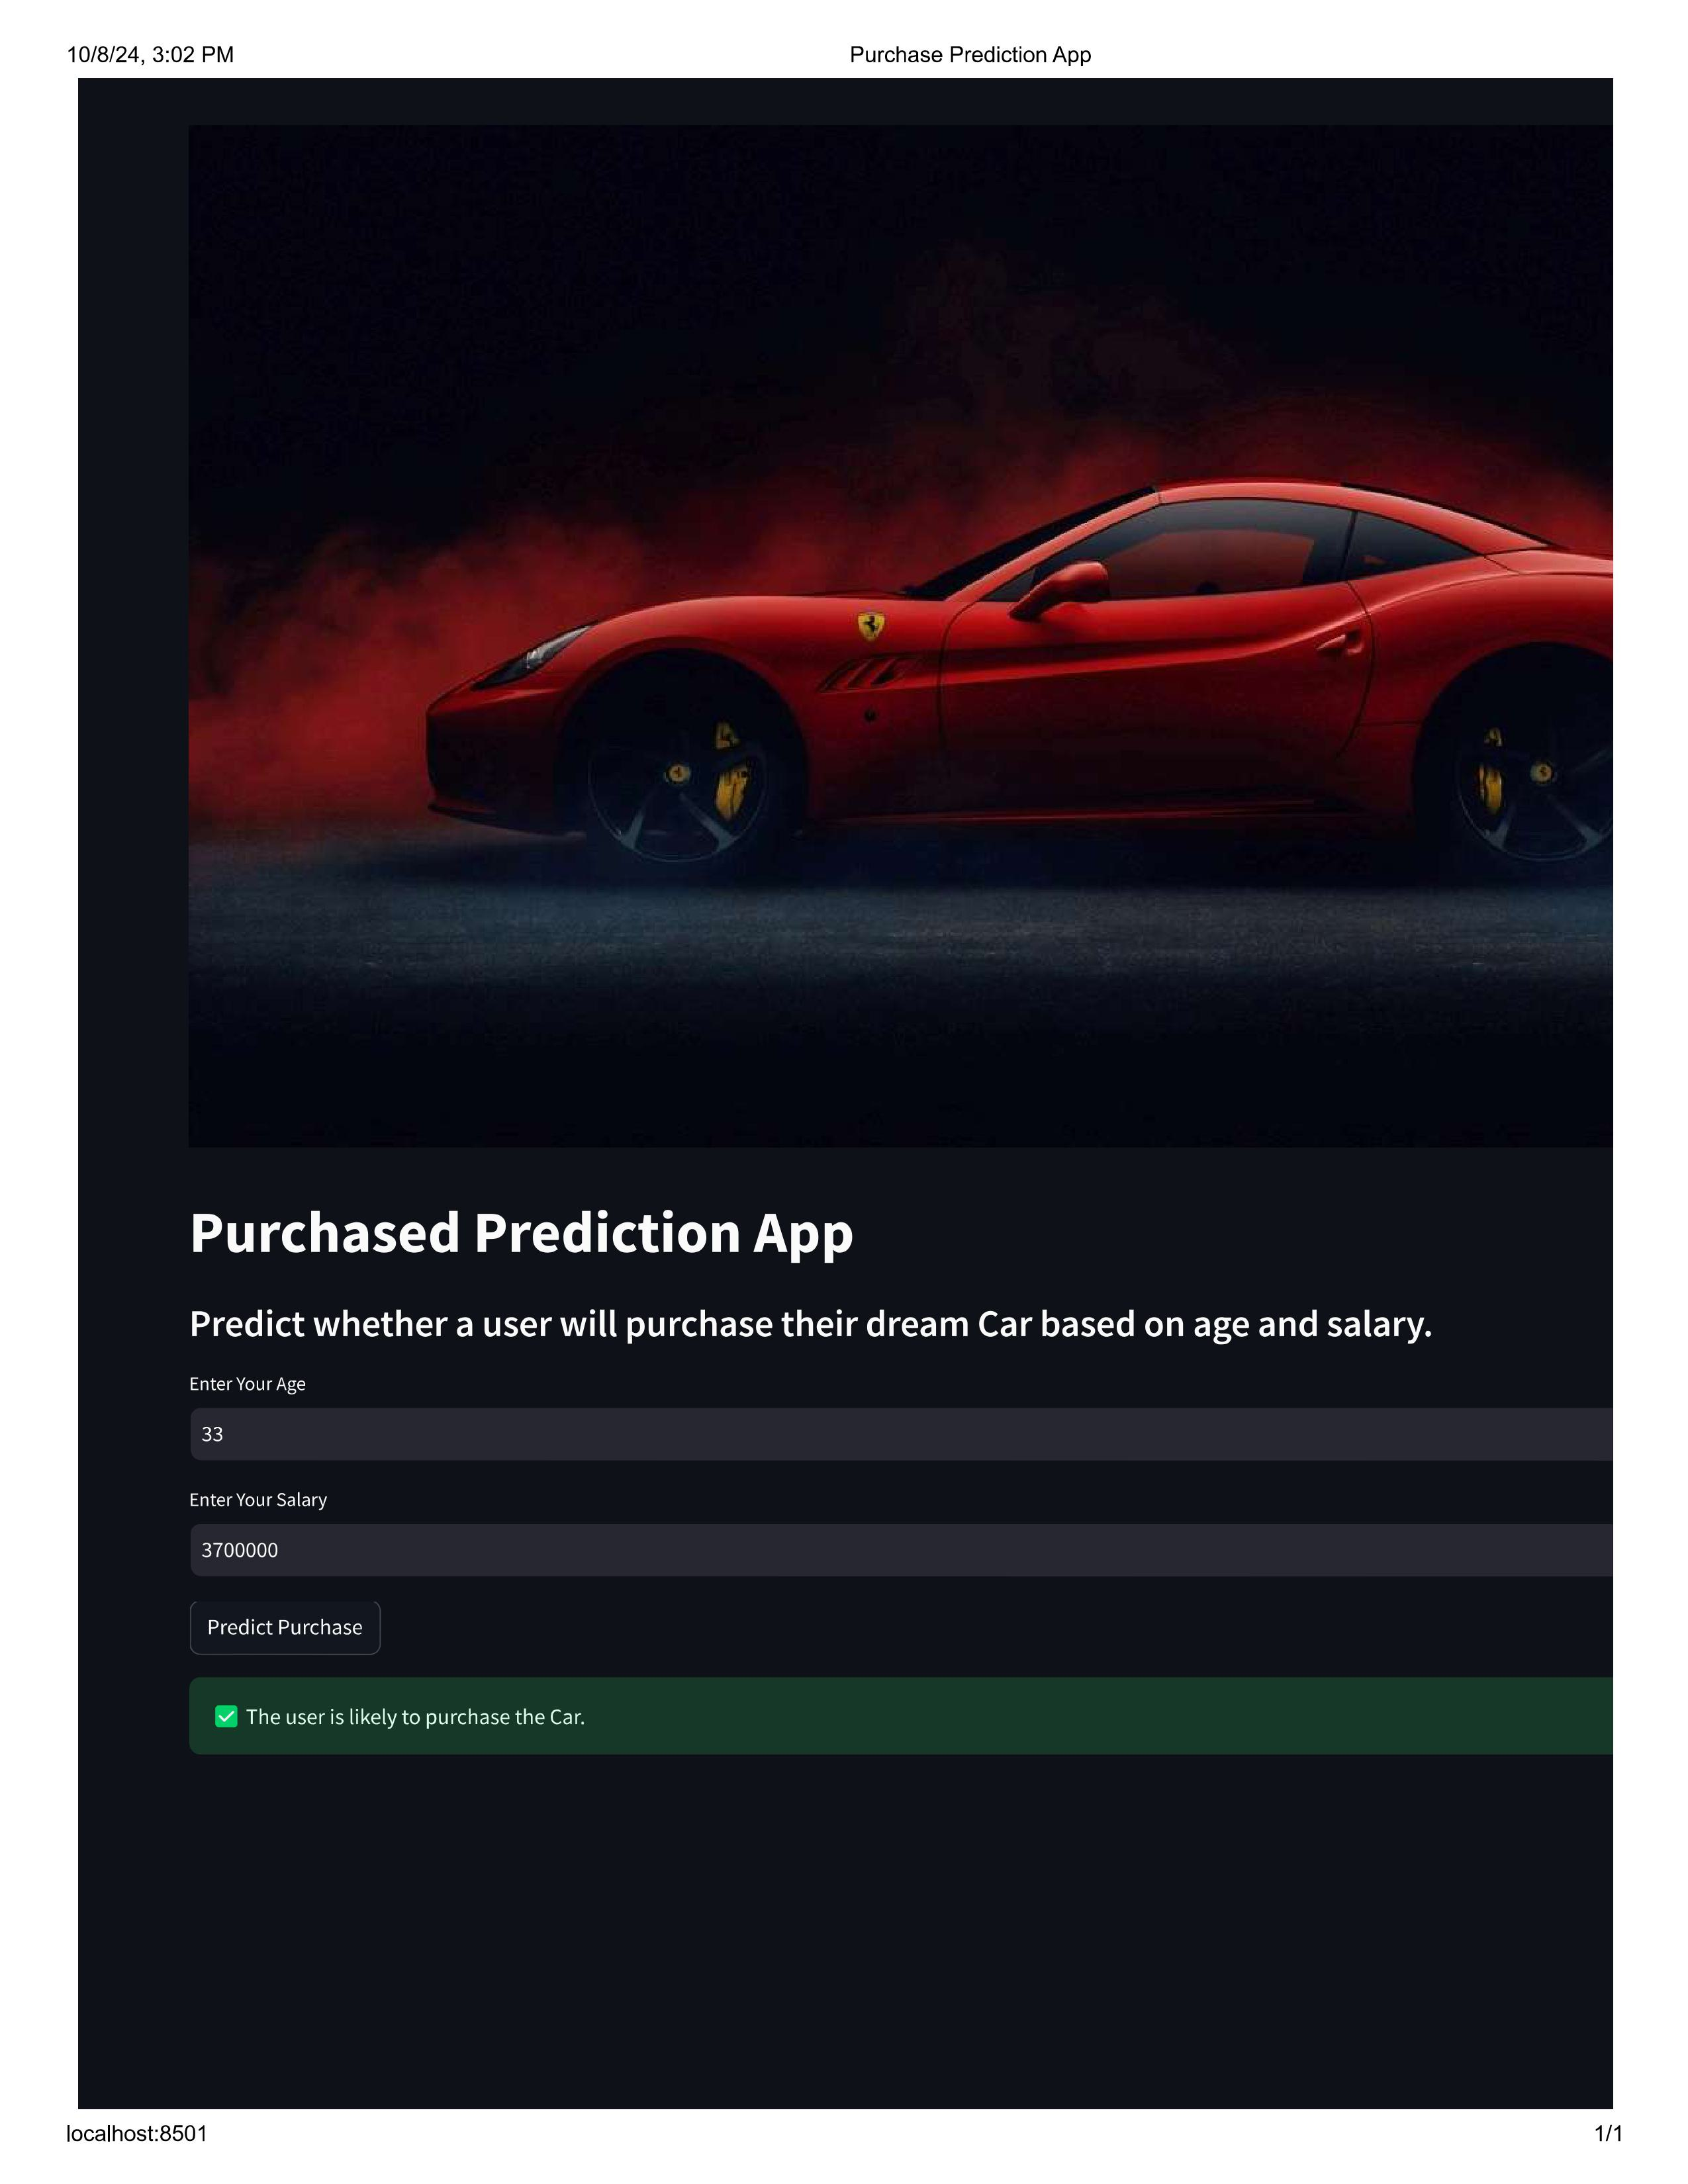

# "The best part of this code is that it is easy for beginners to understand the underlying processes, as I have made an effort to explain each and every line step by step."

### Business Problem:
The goal of this project is to predict whether a person will purchase a car based on their age and salary. This addresses a common business problem in the automotive sales industry: identifying potential customers who are more likely to make a purchase. By understanding customer purchasing patterns, businesses can make data-driven decisions, improve sales targeting, and ultimately increase revenue.

### Steps to Solve the Problem:

1. **Data Understanding & Preprocessing**:
   - The dataset contains information such as `User ID`, `Gender`, `Age`, `Estimated Salary`, and `Purchased` (whether a person purchased a car or not).
   - We extracted the relevant features (`Age` and `Estimated Salary`) as the independent variables and `Purchased` as the target variable.
   - Split the dataset into training (80%) and testing (20%) sets to ensure unbiased model evaluation.
   - Standardized the features using `StandardScaler` to normalize the data for improved performance.

2. **Model Training**:
   - A **Logistic Regression** model was trained on the preprocessed training data. Logistic regression is well-suited for binary classification tasks like this (purchased or not).
   - After training, the model learned patterns that associate a person’s age and salary with their purchasing decision.

3. **Model Prediction**:
   - The model was tested on unseen data (the test set), where it predicted whether each individual would purchase a car.
   - The results were evaluated using a **confusion matrix** and accuracy score, indicating how well the model performed.
   - The classification report provided detailed metrics like precision, recall, and F1-score.

4. **Model Validation**:
   - Compared the model's performance on training and test data to check for overfitting or underfitting.
   - The model's **bias (training set score)** and **variance (test set score)** were calculated to evaluate generalization ability.
   - Further validated the model by making future predictions on a new dataset.

5. **Streamlit App**:
   - Built a simple and interactive frontend using **Streamlit** to allow users to predict whether a person will purchase a car based on age and salary input.
   - Users enter their age and salary into the app, and the model predicts whether they are likely to purchase a car.
   - This app provides a business-friendly interface, making it easy for non-technical stakeholders to utilize the model's predictive power.

This structured approach not only ensures accurate predictions but also allows businesses to gain actionable insights for customer targeting.

## Whole code at one place


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import os

# Load the dataset
df = pd.read_csv(r"D:\Data science NIT\Class Lecture\October\2.LOGISTIC REGRESSION CODE\logit classification.csv")

# Extract features (Age and Estimated Salary) and target (Purchased)
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Standardize the feature scaling for better model performance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the Logistic Regression model on the training set
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Generate confusion matrix to evaluate model performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Calculate the accuracy score of the model
ac = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", ac)

# Print classification report for precision, recall, and F1-score
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# Calculate bias (training set score)
bias = classifier.score(X_train, y_train)
print("Training Set Score (Bias): ", bias)

# Calculate variance (test set score)
variance = classifier.score(X_test, y_test)
print("Test Set Score (Variance): ", variance)

# ------- FUTURE PREDICTION --------

# Load the future dataset for predictions
future_data = pd.read_csv(r"D:\Data science NIT\Class Lecture\October\2.LOGISTIC REGRESSION CODE\Future prediction1.csv")

# Keep a copy of the future dataset for later use
d2 = future_data.copy()

# Extract Age and Salary from future data
future_data = future_data.iloc[:, [2, 3]].values

# Standardize the future data using the same scaler
M = sc.transform(future_data)

# Predict future purchases using the trained classifier
d2['y_pred1'] = classifier.predict(M)

# Save the predictions to a CSV file
d2.to_csv('pred_model.csv', index=False)

# Get the current working directory to locate the output file
print("Saved predictions to: ", os.getcwd())


Confusion Matrix:
 [[57  1]
 [ 5 17]]
Accuracy Score:  0.925
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80

Training Set Score (Bias):  0.821875
Test Set Score (Variance):  0.925
Saved predictions to:  Z:\Jupyter\srkNotes\Resume Project


# Step by step explanation of the code #

## 1. Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import os


- numpy and pandas: These libraries are used for handling data manipulation and numerical computations.
- matplotlib.pyplot: Used for plotting graphs (though not used directly in this code).
- train_test_split: A function from sklearn used to split the dataset into training and testing sets.
- StandardScaler: Standardizes features by removing the mean and scaling them to unit variance, which is important for models like logistic regression.
- LogisticRegression: A linear model from sklearn used to perform logistic regression.
confusion_matrix, accuracy_score, classification_report: Metrics to evaluate the performance of the logistic regression model.
- os: A module to interact with the operating system, used here to get the current working directory.

## 2. Load the dataset

In [3]:
df = pd.read_csv(r"D:\Data science NIT\Class Lecture\October\2.LOGISTIC REGRESSION CODE\logit classification.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


- Loads the dataset containing features like Age, Estimated Salary, and whether the customer purchased a product (Purchased column) into a pandas DataFrame named df.

## 3. Extract features (Age and Estimated Salary) and target (Purchased)

In [4]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

In [5]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

- X: Extracts the independent variables (features) from columns 2 (Age) and 3 (Estimated Salary) as a NumPy array.
- y: Extracts the dependent variable (Purchased), which is the last column, to serve as the target variable.

## 4. Split the data into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

- Splits the dataset into training (80%) and testing (20%) sets.
- random_state=0: Ensures the split is reproducible, meaning the same data split will occur every time you run the code.


## 5. Standardize the feature scaling

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

- StandardScaler is used to standardize the data so that each feature has a mean of 0 and a standard deviation of 1. This helps the logistic regression model perform better.
- fit_transform: Fits the scaler to the training data and transforms it.
- transform: Uses the same scaling transformation applied to the training data and applies it to the test data (to ensure both are on the same scale).

In [10]:
X_test

array([[-7.98950822e-01,  4.94607583e-01],
       [-2.12648508e-02, -5.77359062e-01],
       [-3.12897090e-01,  1.46942725e-01],
       [-7.98950822e-01,  2.62831011e-01],
       [-3.12897090e-01, -5.77359062e-01],
       [-1.09058306e+00, -1.44652121e+00],
       [-7.01740076e-01, -1.59138156e+00],
       [-2.15686344e-01,  2.14601566e+00],
       [-1.96547978e+00, -5.58617754e-02],
       [ 8.53631867e-01, -7.80163563e-01],
       [-7.98950822e-01, -6.06331134e-01],
       [-9.93372315e-01, -4.32498705e-01],
       [-1.18475597e-01, -4.32498705e-01],
       [ 7.59458956e-02,  2.04886868e-01],
       [-1.77105829e+00,  4.65635512e-01],
       [-6.04529329e-01,  1.36376973e+00],
       [-1.18475597e-01,  2.04886868e-01],
       [-1.86826903e+00,  4.36663440e-01],
       [ 1.63131784e+00,  1.74040666e+00],
       [-3.12897090e-01, -1.38857706e+00],
       [-3.12897090e-01, -6.64275277e-01],
       [ 8.53631867e-01,  2.14601566e+00],
       [ 2.70367388e-01, -5.48386991e-01],
       [ 8.

## 6. Train the Logistic Regression model

In [11]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression()

- LogisticRegression(): Initializes the logistic regression model.
- fit: Trains the logistic regression model using the standardized training data X_train and the training target y_train.

## 7. Predict on the test set

In [12]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

- predict: Uses the trained logistic regression model to predict whether the customers in the test set bought the product (y_test)

## 8. Generate confusion matrix

In [13]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[57  1]
 [ 5 17]]


- confusion_matrix: Computes a confusion matrix, which helps evaluate the performance of the classifier by showing true positives, true negatives, false positives, and false negatives.
- The result is printed to display the matrix.

## 9. Calculate the accuracy score

In [14]:
ac = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", ac)


Accuracy Score:  0.925


## 10. Print the classification report

In [15]:
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



- classification_report: Provides a detailed performance report, including precision, recall, F1-score, and support for each class (whether the customer purchased the product or not)

## 11. Calculate the bias (training set score)

In [16]:
bias = classifier.score(X_train, y_train)
print("Training Set Score (Bias): ", bias)


Training Set Score (Bias):  0.821875


- score: Returns the accuracy of the model on the training set, which helps measure how well the model fits the training data (bias)

## 12. Calculate the variance (test set score)

In [17]:
variance = classifier.score(X_test, y_test)
print("Test Set Score (Variance): ", variance)


Test Set Score (Variance):  0.925


- score: Calculates the model's accuracy on the test set to measure its variance or generalization ability.

## 13. Load the future dataset for predictions

In [18]:
future_data = pd.read_csv(r"D:\Data science NIT\Class Lecture\October\2.LOGISTIC REGRESSION CODE\Future prediction1.csv")
future_data

,User ID,Gender,Age,EstimatedSalary
0,15724611,Male,45,60000
1,15725621,Female,79,64000
2,15725622,Male,23,78000
3,15720611,Female,34,45000
4,15588044,Male,29,76000
5,15746039,Female,70,89000
6,15704887,Male,86,120000
7,15746009,Female,46,23000
8,15876009,Male,32,70000
9,15886009,Female,100,90000


- Loads a new dataset (Future prediction1.csv) to predict whether customers will buy the product based on Age and Estimated Salary.

## 14. Keep a copy of the future dataset

In [19]:
d2 = future_data.copy()
d2

,User ID,Gender,Age,EstimatedSalary
0,15724611,Male,45,60000
1,15725621,Female,79,64000
2,15725622,Male,23,78000
3,15720611,Female,34,45000
4,15588044,Male,29,76000
5,15746039,Female,70,89000
6,15704887,Male,86,120000
7,15746009,Female,46,23000
8,15876009,Male,32,70000
9,15886009,Female,100,90000


## 15. Extract Age and Salary from future data

- Creates a copy of the dataset future_data as d2, which will later store the predictions.

In [20]:
future_data = future_data.iloc[:, [2, 3]].values
future_data

array([[    45,  60000],
       [    79,  64000],
       [    23,  78000],
       [    34,  45000],
       [    29,  76000],
       [    70,  89000],
       [    86, 120000],
       [    46,  23000],
       [    32,  70000],
       [   100,  90000]], dtype=int64)

- Extracts Age and Estimated Salary from the future dataset for model predictions.

## 16. Standardize the future data

In [21]:
M = sc.transform(future_data)
M

array([[ 6.59210374e-01, -2.87638347e-01],
       [ 3.96437575e+00, -1.71750061e-01],
       [-1.47942605e+00,  2.33858940e-01],
       [-4.10107836e-01, -7.22219420e-01],
       [-8.96161568e-01,  1.75914797e-01],
       [ 3.08947903e+00,  5.52551726e-01],
       [ 4.64485098e+00,  1.45068594e+00],
       [ 7.56421121e-01, -1.35960499e+00],
       [-6.04529329e-01,  2.08236764e-03],
       [ 6.00580143e+00,  5.81523798e-01]])

- transform: Standardizes the future data using the same scaling (fit on training data) to ensure the model can make accurate predictions.

## 17. Predict future purchases

In [22]:
d2['y_pred1'] = classifier.predict(M)
d2

,User ID,Gender,Age,EstimatedSalary,y_pred1
0,15724611,Male,45,60000,1
1,15725621,Female,79,64000,1
2,15725622,Male,23,78000,0
3,15720611,Female,34,45000,0
4,15588044,Male,29,76000,0
5,15746039,Female,70,89000,1
6,15704887,Male,86,120000,1
7,15746009,Female,46,23000,0
8,15876009,Male,32,70000,0
9,15886009,Female,100,90000,1


- Uses the trained logistic regression model to predict whether customers in the future dataset will buy the product. The results are stored in a new column y_pred1 in the d2 DataFrame.

## 18. Save the predictions

In [23]:
d2.to_csv('pred_model.csv', index=False)


- Saves the updated d2 DataFrame, including the predictions, to a CSV file named pred_model.csv.

## 19. Save the predictions to a different directory

- os.getcwd(): Retrieves the current working directory where the pred_model.csv file is saved. The location is printed to the console.

In [24]:
# Save the predictions to a different directory
output_path = r"D:\Data science NIT\Resume Project.csv"  # Specify your desired directory
d2.to_csv(output_path, index=False)

print(f"Saved predictions to: {output_path}")


Saved predictions to: D:\Data science NIT\Resume Project.csv


- output_path: This variable is used to define the path where the predictions will be saved. The path is specified as r"D:\Data science NIT\Resume Project.csv", meaning the predictions will be saved to a CSV file named Resume Project.csv in the directory D:\Data science NIT\.

- r (raw string): Ensures that the backslashes in the file path are treated as literal characters and not escape characters.
- d2.to_csv(output_path, index=False): This saves the DataFrame d2 (which contains both the original data and predictions) to the specified output_path.

- index=False: Ensures that the DataFrame's index is not included in the output CSV file.
- print(f"Saved predictions to: {output_path}"): This uses Python’s f-string to display a message confirming where the predictions have been saved, showing the full file path of the saved file.

# Streamlit Application for Purchase Prediction 

In [25]:
%%writefile app3.py

import streamlit as st
import pickle
import pandas as pd
from PIL import Image

# Set the page title and layout
st.set_page_config(page_title="Purchase Prediction App", layout="wide")

# Load and display a background image
image = Image.open(r"Z:\Jupyter\srkNotes\Resume Project\1680187651527.jpeg")  # Replace with your image path
st.image(image, use_column_width=True)

# App title
st.title('Purchased Prediction App')
st.subheader('Predict whether a user will purchase their dream Car based on age and salary.')

# Input fields for user data
age = st.number_input('Enter Your Age', min_value=0, max_value=120)
salary = st.number_input('Enter Your Salary', min_value=0, step=100)

# Load the saved scaler
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Load the saved logistic regression model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Create a DataFrame from the user input
df = pd.DataFrame({'Age': [age], 'Salary': [salary]})

# Button to make prediction
if st.button('Predict Purchase'):
    # Scale the input data using the loaded scaler
    scaled_data = loaded_scaler.transform(df)

    # Predict the outcome using the loaded model
    output = loaded_model.predict(scaled_data)

    # Display the prediction result
    if output[0] == 1:
        st.success('✅ The user is likely to purchase the Car.')
    else:
        st.error('❌ The user is not likely to purchase the Car.')


Overwriting app3.py


In [26]:
pwd

'Z:\\Jupyter\\srkNotes\\Resume Project'

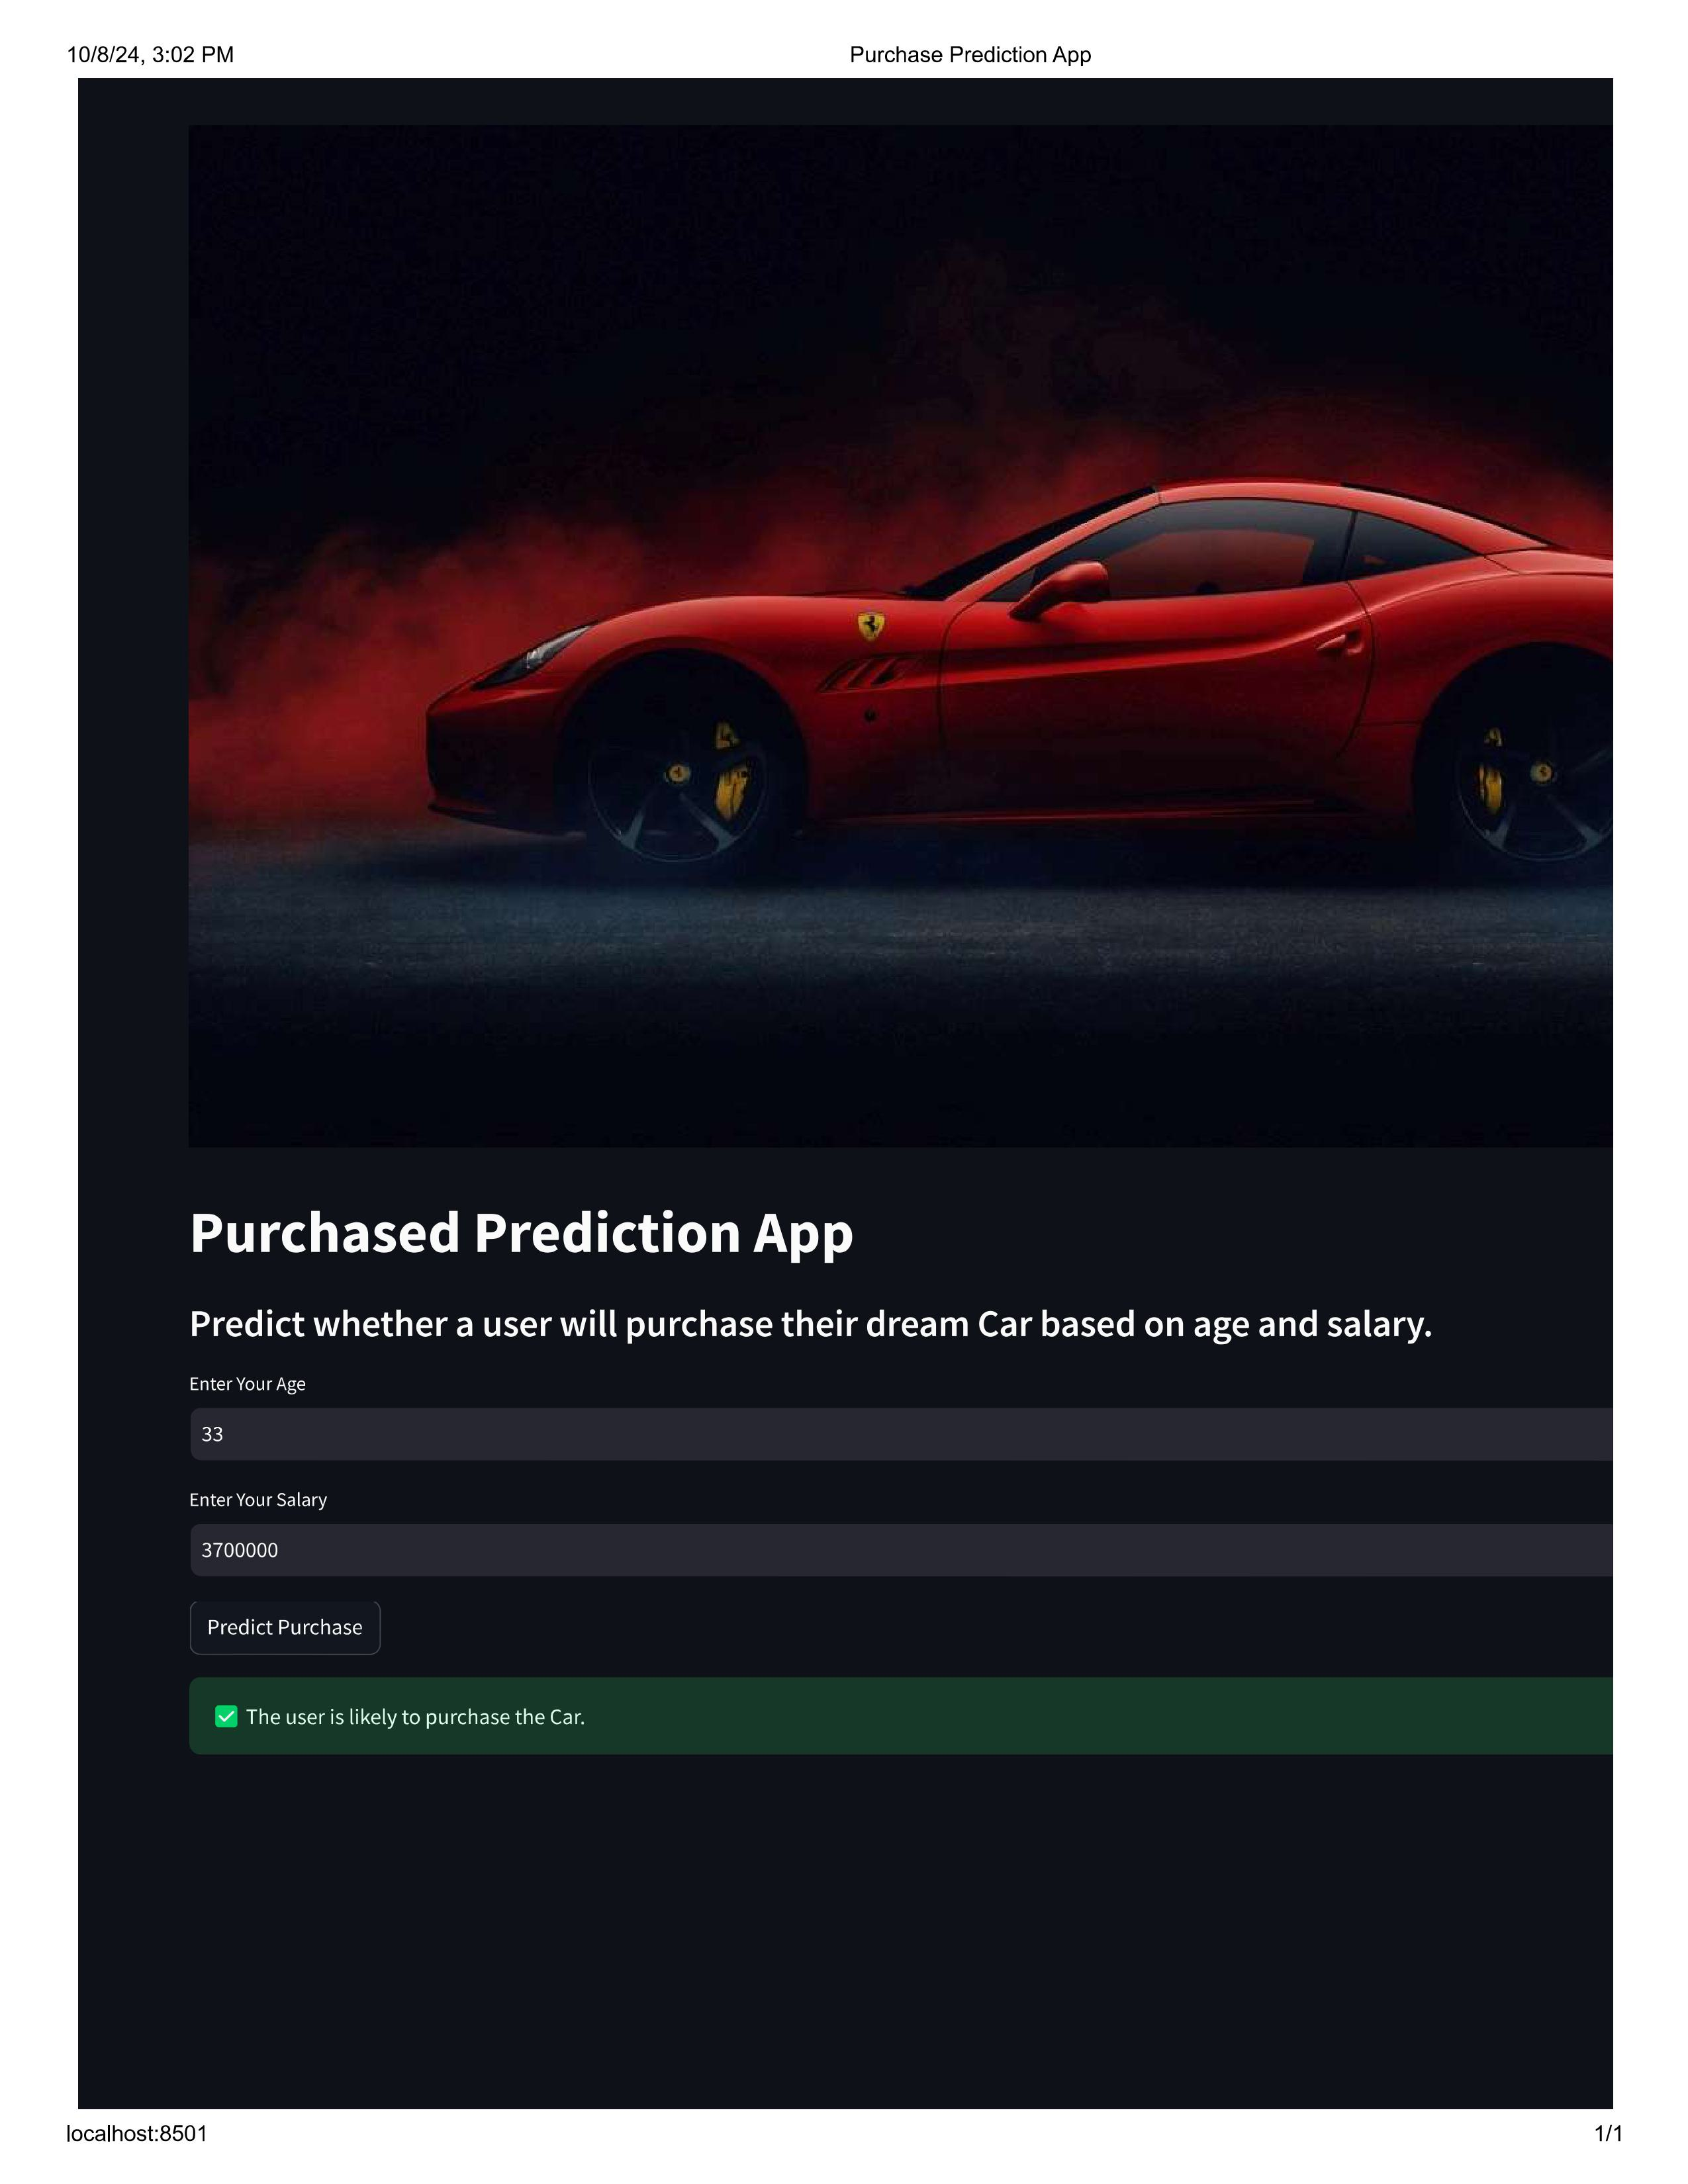